<img src="gcd.png" align="right" style="float" width="100">

<img src="logo_UV.jpg"  align="right" style="float" width="200">

<font color="#CA3532"><h1 align="left">Degree in Data Science.</h1></font>
<font color="#6E6E6E"><h2 align="left">Lab Session 7. Lab Exam.</h2></font> 

#### Name and Surname

## 1) Instructions

The grade of the exam will not depend only on the obtained results but also on the procedure followed and its proper reasoning. For the evaluation of the exam, you have to include comments describing what you have done and its motivation. The use of knowledge learned during ALL lab sessions will be positively evaluated.

+ `The use of the SCIKIT-LEARN library is preferred`
+ `Code without any comments will be penalized`
+ `Answer carefully any question suggested`

#### Submission

At the end of the session, you have to submit to AulaVirtual:

* A compressed folder (ZIP) that has to contain:
  +  A `data` folder with the data subsets, including those data files obtained while doing the exam. 
  +  A `LS7_2023_2024.ipynb` file with your work, including your comments and answers to the proposed questions.
  
**Please, do not change the names of the files** 

## 2) ML task to solve: University Admission Estimation

We want to develop a machine learning model (regressor) to estimate the chance of admitting students to the University according to their academic records (target, ranging from 0 to 1), which are represented by the following input features: 

1. GRE Scores (range [0,340])
2. TOEFL Scores (range [0,120])
3. University Rating (1,2,3,4 or 5)
4. Statement of Purpose (SOP) Strength (range [0,5])
5. Letter of Recommendation (LOR) Strength (range [0,5])
5. Undergraduate GPA (range [0,10])
6. Research Experience (yes or no, i.e., either 0 or 1)

To this end, the database 'X_model_L1.csv', 'y_model_L1.csv' has 800 entries. Moreover, an additional subset 'X_eval_L1.csv' with 200 entries is provided for internal evaluation or test purposes (to be done by the professor, see last exercise).

### Packages required for the exam

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics
from sklearn.feature_selection import mutual_info_regression, SelectKBest 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

## 3) Exercises

### Exercise 1 (0.5 points)

Import the data files `X_model_L1.csv`, `y_model_L1.csv` y `X_eval_L1.csv` provided. Data have to be stored in three variables denoted as `X`, `Y` and  `X_eval`, respectively. To this end, you can use the `pd.read_csv` function from pandas. Once the DataFrame variables are loaded, transform them into numpy arrays.

In [30]:
# Import data files
X = pd.read_csv('data/X_model_L1.csv')
Y = pd.read_csv('data/y_model_L1.csv')
X_eval = pd.read_csv('data/X_eval_L1.csv')

# Transform DataFrames into NumPy arrays
X = X.values
Y = Y.values.ravel()
X_eval = X_eval.values

### Exercise 2 (0.5 points)

Divide the dataset `X`, `y` into training (70% samples, `X_train`and `y_train`) and test (30% samples, `X_test` and `y_test`) subsets using the *hold-out* logic. Provide to *hold-out* a random state for the reproducibility of results, using a seed value equal to 4321.

In [31]:
# Split the data into training and test sets
random_state = 4321
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (560, 7)
X_test shape: (240, 7)
y_train shape: (560,)
y_test shape: (240,)


### Exercise 3 (1.5 points) 
a) Identify and encode the input categorical variables using OrdinalEncoder.

b) Identify and standardize (mean=0, std=1) the input continuous variables.

To do this, first variables can be splitted into categorical and continuous subsets, then they can be encoded/normalized and, finally, the whole dataset can be again concatenated (e.g., by using `np.concatenate`). Store also the name of the variables by following the new order after this pre-processing stage.

Remember to repeat this procedure every time you use new subsets of data, such as `X_eval`.

In [32]:
# Define the categorical and continuous columns
categorical_columns = [2, 6]
continuous_columns = [0, 1, 3, 4, 5]

# Use OrdinalEncoder for categorical variables
ordinal_encoder = OrdinalEncoder()
X_train[:, categorical_columns] = ordinal_encoder.fit_transform(X_train[:, categorical_columns])
X_test[:, categorical_columns] = ordinal_encoder.transform(X_test[:, categorical_columns])
X_eval[:, categorical_columns] = ordinal_encoder.transform(X_eval[:, categorical_columns])

# Use StandardScaler for continuous variables
scaler = StandardScaler()
X_train[:, continuous_columns] = scaler.fit_transform(X_train[:, continuous_columns])
X_test[:, continuous_columns] = scaler.transform(X_test[:, continuous_columns])
X_eval[:, continuous_columns] = scaler.transform(X_eval[:, continuous_columns])

# Display the shapes of the resulting sets
print("X_train_processed shape:", X_train.shape)
print("X_test_processed shape:", X_test.shape)
print("X_eval_processed shape:", X_eval.shape)


X_train_processed shape: (560, 7)
X_test_processed shape: (240, 7)
X_eval_processed shape: (200, 7)


### Exercise 4 (1.5 points) 

Using the normalized training subset `X_train`, we want to perform a Mutual Information (MI) analysis for dimensionality reduction purposes. 

a) (0.5 points) Explain briefly what is the mutual information.

b) (0.5 points) First, we will measure the MI between input variables and discard the two variables with the highest MI, keeping the first among the ones selected, i.e, if `var1` and `var2` have the highest mutual information, `var2` would be removed. 

   * Plot the mutual information between input variables using `imshow()`.

   * Indices for the input variables kept will be stored in a list variable named as `input_mi_set`.

c) (0.5 points) Then, we will measure the MI between input and target variables, keeping the 5 input variables with the highest MI. Indices for the input variables kept will be stored in a list variable named as `input_target_mi_set`.

HINT: `numpy.delete()` can be used to remove the features (columns) you are not interested. 

Mutual Information is a measure of the amount of information shared between two variables. Mutual information quantifies the dependence or relationship between a feature and the target variable.

Variable with the highest mutual information: 5


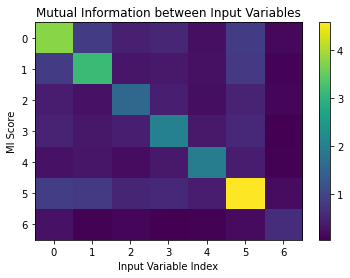

In [28]:
input_mi_set = list(range(X_train.shape[1]))

# Calculate mutual information between input variables
mi_scores = [mutual_info_regression(X_train, X_train[:, i]) for i in range(X_train.shape[1])]

# Find the index of the variable with the highest mutual information
max_idx = np.argmax(np.mean(mi_scores, axis=1))

# Print the index of the variable with the highest mutual information
print("Variable with the highest mutual information:", max_idx)

# Remove the variable with the highest mutual information from input_mi_set
input_mi_set.remove(max_idx)


# Plot the mutual information
plt.imshow(np.array(mi_scores).T, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Mutual Information between Input Variables')
plt.xlabel('Input Variable Index')
plt.ylabel('MI Score')
plt.show()

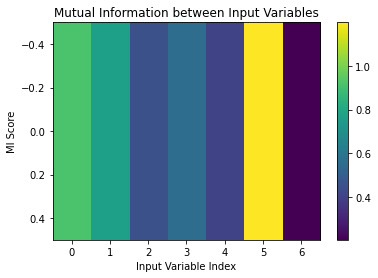

[0, 1, 2, 3, 4, 6]


In [6]:
# Measure MI between input variables
mi_scores = mutual_info_regression(X_train, y_train)

# Find the indices of the two variables with the highest MI
top_indices = np.argsort(mi_scores)[-1:]

# Plot the mutual information
plt.imshow(mi_scores.reshape(1, -1), cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Mutual Information between Input Variables')
plt.xlabel('Input Variable Index')
plt.ylabel('MI Score')
plt.show()

# Discard the two variables with the highest MI
X_train_mi_filtered = np.delete(X_train, top_indices, axis=1)
input_mi_set = [i for i in range(X_train.shape[1]) if i not in top_indices]

print(input_mi_set)

In [7]:
# Measure MI between input and target variables
mi_scores_target = mutual_info_regression(X_train, np.ravel(y_train))

# Find the indices of the 5 variables with the highest MI
top_indices_target = np.argsort(mi_scores_target)[-5:]

# Store the indices of input variables kept
input_target_mi_set = [i for i in range(X_train.shape[1]) if i in top_indices_target]

# Display indices
print("Indices to keep:", input_target_mi_set)

Indices to keep: [0, 1, 2, 3, 5]


### Exercise 5 (2 points)

Now we are going to apply a SVM regression model (SVR) with RBF kernel over the training subset `X_train` to estimate the chance of admitting students to the University.

a) (0.5 points) Using the input variables in the `input_mi_set` set, determine the best combination of hyperparameters $C$, $\gamma$ and $\epsilon$. Use k-fold (k=5) and the following parameter ranges:

- **$C\in[10^{-3}, 10^3]$**. Take 7 evenly-spaced values of C in logarithmic scale.
- **$\gamma \in[10^{-3}, 10^3]$**. Take 7 evenly-spaced values of $\gamma$ in logarithmic scale.
- **$\epsilon \in[10^{-3}, 10^3]$**. Take 7 evenly-spaced values of $\epsilon$ in logarithmic scale.

b) (0.5 points) Discuss the effect of the values obtained for the best combination of hyperparameters.

c) (0.25 points) Evaluate the model obtained on the test subset `X_test` using MSE and the coefficient of determination.

d) (0.75 points) Repeat a) and c), now using the input variables in the `input_target_mi_set` set. Which of the models performs best?

In [8]:
# Define the param grid
param_grid = {
    'C': np.logspace(-3, 3, 7),
    'gamma': np.logspace(-3, 3, 7),
    'epsilon': np.logspace(-3, 3, 7)
}

# Create the SVR model
svr = SVR(kernel='rbf')

# Perform GridSearchCV with k-fold
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train[:, input_mi_set], y_train)

# Display best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 10.0, 'epsilon': 0.01, 'gamma': 0.1}


b)Higher C values may lead to a more complex model, C was not chosen too large, which will not make the model overfitting.
Gamma is small, which will not result in a smaller range of influence for each support vector.
Epislon is very small, which does not allow for a greater margin of tolerance for errors.

In [9]:
# Get the best SVR model from GridSearchCV
best_svr = grid_search.best_estimator_

# Predict on the test set
y_pred = best_svr.predict(X_test[:, input_mi_set])

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print("MSE on Test Set:", mse)
print("R^2 on Test Set:", r2)

MSE on Test Set: 0.006134085425372474
R^2 on Test Set: 0.7113800721612844


In [10]:
# Perform GridSearchCV with k-fold cross-validation
grid_search_target = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_target.fit(X_train[:, input_target_mi_set], y_train)

# Display the best hyperparameters for the target set
best_params_target = grid_search_target.best_params_
print("Best Hyperparameters for Target Set:", best_params_target)

# Get the best SVR model from GridSearchCV for the target set
best_svr_target = grid_search_target.best_estimator_

# Predict on the test set for the target set
y_pred_target = best_svr_target.predict(X_test[:, input_target_mi_set])

# Evaluate the model for the target set
mse_target = mean_squared_error(y_test, y_pred_target)
r2_target = r2_score(y_test, y_pred_target)

# Display the evaluation metrics for the target set
print("MSE on Test Set (Target Set):", mse_target)
print("R^2 on Test Set (Target Set):", r2_target)

Best Hyperparameters for Target Set: {'C': 100.0, 'epsilon': 0.01, 'gamma': 0.01}
MSE on Test Set (Target Set): 0.005098681505376113
R^2 on Test Set (Target Set): 0.7600977185502938


### Exercise 6 (2 points)

Now we are going to apply a bagging of decision trees model (`BaggingRegressor`, `DecisionTreeRegressor`) over the training subset `X_train` to estimate the chance of admitting students to the University.

a) (0.75 points) Using the input variables in the `input_mi_set` set, determine the best combination of hyperparameters `n_estimators` and `max_samples`. Use k-fold (k=5) and the following parameter ranges:

- `n_estimators` $\in [1, 200]$. Consider step=10 to validate this parameter.
- `max_samples` $\in [1, 300]$. Consider step=20 to validate this parameter.

b) (0.25 points) Evaluate the model obtained on the test subset `X_test` using MSE and the coefficient of determination.

c) (1 point) Repeat a) and b), now using the input variables in the `input_target_mi_set` set. Which of the models performs best?

In [11]:
# Define the param grid
param_grid_bagging = {
    'n_estimators': np.arange(1, 201, 10),
    'max_samples': np.arange(1, 301, 20)
}

# Create the DecisionTreeRegressor
base_estimator = DecisionTreeRegressor()

# Create the BaggingRegressor
bagging_regressor = BaggingRegressor(base_estimator=base_estimator)

# Perform GridSearchCV with k-fold
grid_search_bagging = GridSearchCV(bagging_regressor, param_grid_bagging, cv=5)
grid_search_bagging.fit(X_train[:, input_mi_set], y_train)

# Display the best hyperparameters for BaggingRegressor
best_params_bagging = grid_search_bagging.best_params_
print("Best Hyperparameters for BaggingRegressor:", best_params_bagging)

Best Hyperparameters for BaggingRegressor: {'max_samples': 241, 'n_estimators': 41}


In [12]:
# Get the best BaggingRegressor from GridSearchCV
best_bagging_regressor = grid_search_bagging.best_estimator_

# Predict on the test set
y_pred_bagging = best_bagging_regressor.predict(X_test[:, input_mi_set])

# Evaluate the BaggingRegressor
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)

# Display the metrics
print("MSE on Test Set (BaggingRegressor):", mse_bagging)
print("R^2 on Test Set (BaggingRegressor):", r2_bagging)

MSE on Test Set (BaggingRegressor): 0.004627831704631834
R^2 on Test Set (BaggingRegressor): 0.7822520620407802


In [13]:
# Perform GridSearchCV with k-fold cross-validation
grid_search_bagging_target = GridSearchCV(bagging_regressor, param_grid_bagging, cv=5)
grid_search_bagging_target.fit(X_train[:, input_target_mi_set], y_train)

# Display the best hyperparameters for BaggingRegressor with target set
best_params_bagging_target = grid_search_bagging_target.best_params_
print("Best Hyperparameters for BaggingRegressor (Target Set):", best_params_bagging_target)

# Get the best BaggingRegressor model from GridSearchCV for the target set
best_bagging_regressor_target = grid_search_bagging_target.best_estimator_

# Predict on the test set for the target set
y_pred_bagging_target = best_bagging_regressor_target.predict(X_test[:, input_target_mi_set])

# Evaluate the BaggingRegressor model for the target set
mse_bagging_target = mean_squared_error(y_test, y_pred_bagging_target)
r2_bagging_target = r2_score(y_test, y_pred_bagging_target)

# Display the evaluation metrics for BaggingRegressor with target set
print("MSE on Test Set (BaggingRegressor, Target Set):", mse_bagging_target)
print("R^2 on Test Set (BaggingRegressor, Target Set):", r2_bagging_target)

Best Hyperparameters for BaggingRegressor (Target Set): {'max_samples': 281, 'n_estimators': 31}
MSE on Test Set (BaggingRegressor, Target Set): 0.003945458289975718
R^2 on Test Set (BaggingRegressor, Target Set): 0.8143589780746643


### Exercise 7 (1.5 points)
Represent the predictions vs. the target values for the test subset `X_test` and the four approaches (`SVR`/`BaggingRegressor` with `input_mi_set` and `input_target_mi_set` variable sets). Plot a straight line with slope=1 to represent target values vs. target values as a reference to evaluate the model performance.

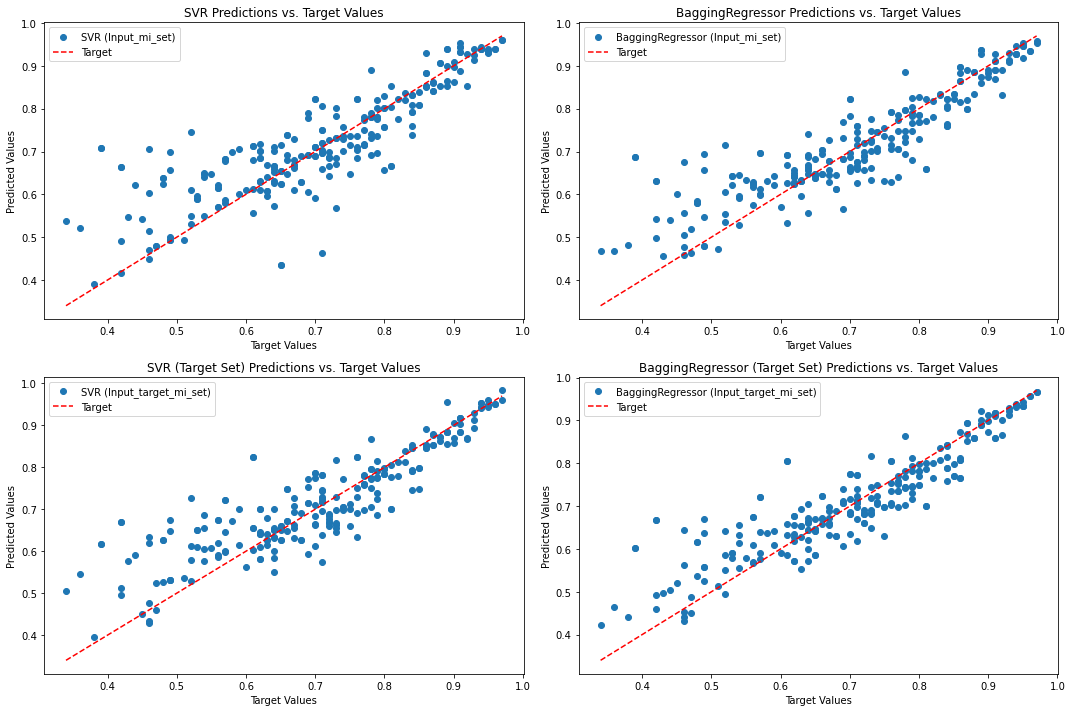

In [14]:

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Scatter plot for SVR with input_mi_set
axes[0, 0].scatter(y_test, y_pred, label='SVR (Input_mi_set)')
axes[0, 0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Target')
axes[0, 0].set_title('SVR Predictions vs. Target Values')
axes[0, 0].set_xlabel('Target Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].legend()

# Scatter plot for BaggingRegressor with input_mi_set
axes[0, 1].scatter(y_test, y_pred_bagging, label='BaggingRegressor (Input_mi_set)')
axes[0, 1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Target')
axes[0, 1].set_title('BaggingRegressor Predictions vs. Target Values')
axes[0, 1].set_xlabel('Target Values')
axes[0, 1].set_ylabel('Predicted Values')
axes[0, 1].legend()

# Scatter plot for SVR with input_target_mi_set
axes[1, 0].scatter(y_test, y_pred_target, label='SVR (Input_target_mi_set)')
axes[1, 0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Target')
axes[1, 0].set_title('SVR (Target Set) Predictions vs. Target Values')
axes[1, 0].set_xlabel('Target Values')
axes[1, 0].set_ylabel('Predicted Values')
axes[1, 0].legend()

# Scatter plot for BaggingRegressor with input_target_mi_set
axes[1, 1].scatter(y_test, y_pred_bagging_target, label='BaggingRegressor (Input_target_mi_set)')
axes[1, 1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Target')
axes[1, 1].set_title('BaggingRegressor (Target Set) Predictions vs. Target Values')
axes[1, 1].set_xlabel('Target Values')
axes[1, 1].set_ylabel('Predicted Values')
axes[1, 1].legend()

plt.tight_layout()
plt.show()



### Exercise 8 (0.5 points)
Use the best model obtained to provide predictions for the `X_eval_L1.csv` evaluation subset. First, use the `whole` `X, y` dataset to retrain the best model, then compute the predictions and store them in a CSV file named as `y_hat.csv` (delimiter=","), e.g., using `np.savetxt`, so we can evaluate the performance of your approach in this internal evaluation subset.

In [19]:
# Retrain the best BaggingRegressor model using the whole X, Y
best_bagging_regressor_final = BaggingRegressor(
    n_estimators=best_params_bagging['n_estimators'],
    max_samples=best_params_bagging['max_samples']
)
best_bagging_regressor_final.fit(X, Y)

# Predict on the evaluation subset
X_eval = pd.read_csv('data/X_eval_L1.csv').values
y_eval_pred = best_bagging_regressor_final.predict(X_eval[:, input_mi_set])

# Save the predictions to a CSV
np.savetxt('y_hat.csv', y_eval_pred, delimiter=',', header='Predicted Values', comments='')

ValueError: X has 6 features, but BaggingRegressor is expecting 7 features as input.